# Decision Tree란?

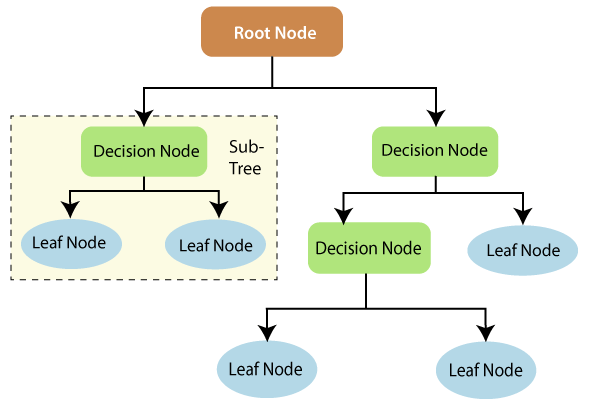

In [1]:
from IPython.display import Image

Image("./Decision_Tree.png")

* Decision Tree 모델은 __분류__ 와 __회귀__ 모두 가능한 __지도학습__ 모델
* 변수 X를 넣어주면 모델이 알아서 조건과 결과값을 학습함.
* 위 모델은 Root Node(첫 번째 분류 기준)로부터 질문에 대한 Y/N에 따라 가지를 뻗쳐나감.
* __Root Node__ 다음부터 나오는 분류기준은 __Decision Node__ , 그에 따른 최종 결과값은 __Leaf Node__ 라고 함.

## <font color=red>장점</font>

1. 전처리 과정이 복잡하지 않음
2. multi-output을 갖는 데이터를 핸들링하기에 용이
3. 결과 해석이 용이

## <font color=red>단점</font>

1. max_depth가 너무 크면 과적합(overfitting) 문제 발생
2. max_depth가 너무 작으면 과소적합 문제 발생
3. 아주 작은 variation으로도 불안정해질 수 있음
4. 특정 class 가 dominant 하다면 편향 문제 발생
5. 변수들이 independent하지 않은 경우 multi-output 문제 발생

## <font color=red>학습 메커니즘</font>

__불순도(impurity)__ 는 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 나타냄
__엔트로피(Entropy)__ 는 불순도를 수치로 나타낸 것 (__엔트로피가 높다 = 불순도가 높다__)

즉, 해당 모델은 불순도를 최소화 하는 방법으로 학습된다

In [2]:
import sklearn
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd

# Decision Tree 학습 모델 로드
from sklearn.tree import DecisionTreeClassifier

In [3]:
# 평가지표 모듈 로드
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score

def evaluate_classifier(y_test, y_pred, roc = False):
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred): .4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average = 'macro'): .4f}")
    print(f"Recall: {recall_score(y_test, y_pred, average = 'macro'): .4f}")
    print(f"F_SCORE: {f1_score(y_test, y_pred, average = 'macro'): .4f}")
    if roc:
        print(f"ROC_AUC: {roc_auc_score(y_test, y_pred, average = 'macro', multi_class = 'ovr'): .4f}")
    print(classification_report(y_test, y_pred))

## 데이터셋1_breast_cancer

In [4]:
#데이터셋 로드
from sklearn.datasets import load_breast_cancer

In [5]:
# digits dataset은 {'key' : value, 'key' : value,...}와 같이 key-value로 이루어진
# 데이터셋임을 알 수 있음.

cancer = load_breast_cancer()
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
# 때문에 .keys() 함수를 이용해 key 값을 뽑아낼 수 있음.
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
# feature matrix가 될 데이터와 target vector가 될 데이터 지정

cancer_data = cancer.data # Feagure matrix
cancer_label = cancer.target # Target vector

X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_label, test_size = 0.2, random_state=42)

In [8]:
# DecisionTreeClassifier 안에 매개변수로 파라미터 설정 가능
tree = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

# 데이터셋2_digits 

In [9]:
from sklearn.datasets import load_digits

digits = load_digits() 
digits_data = digits.data
digits_label = digits.target

In [10]:
X_train, X_test, y_train, y_test = train_test_split(digits_data, digits_label, test_size=0.2, random_state = 15)

In [20]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=0)

In [21]:
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
evaluate_classifier(y_test, y_pred)

Accuracy:  0.5639
Precision:  0.5733
Recall:  0.5828
F_SCORE:  0.5276
              precision    recall  f1-score   support

           0       0.93      0.90      0.92        31
           1       0.35      0.18      0.24        38
           2       0.00      0.00      0.00        38
           3       0.18      0.89      0.30        27
           4       0.70      0.93      0.80        41
           5       0.91      0.89      0.90        35
           6       0.89      0.84      0.86        38
           7       0.76      0.94      0.84        34
           8       0.00      0.00      0.00        35
           9       1.00      0.26      0.41        43

    accuracy                           0.56       360
   macro avg       0.57      0.58      0.53       360
weighted avg       0.59      0.56      0.53       360



C:\Users\SJang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SJang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\SJang\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[28,  0,  0,  2,  1,  0,  0,  0,  0,  0],
       [ 0,  7,  0, 20,  8,  0,  0,  3,  0,  0],
       [ 0, 10,  0, 22,  0,  0,  4,  2,  0,  0],
       [ 0,  2,  0, 24,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0, 38,  1,  0,  2,  0,  0],
       [ 1,  0,  1,  0,  1, 31,  0,  1,  0,  0],
       [ 0,  1,  0,  1,  3,  1, 32,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 32,  0,  0],
       [ 1,  0,  0, 32,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  1, 29,  2,  0,  0,  0,  0, 11]], dtype=int64)

In [23]:
from sklearn import tree

<IPython.core.display.Javascript object>


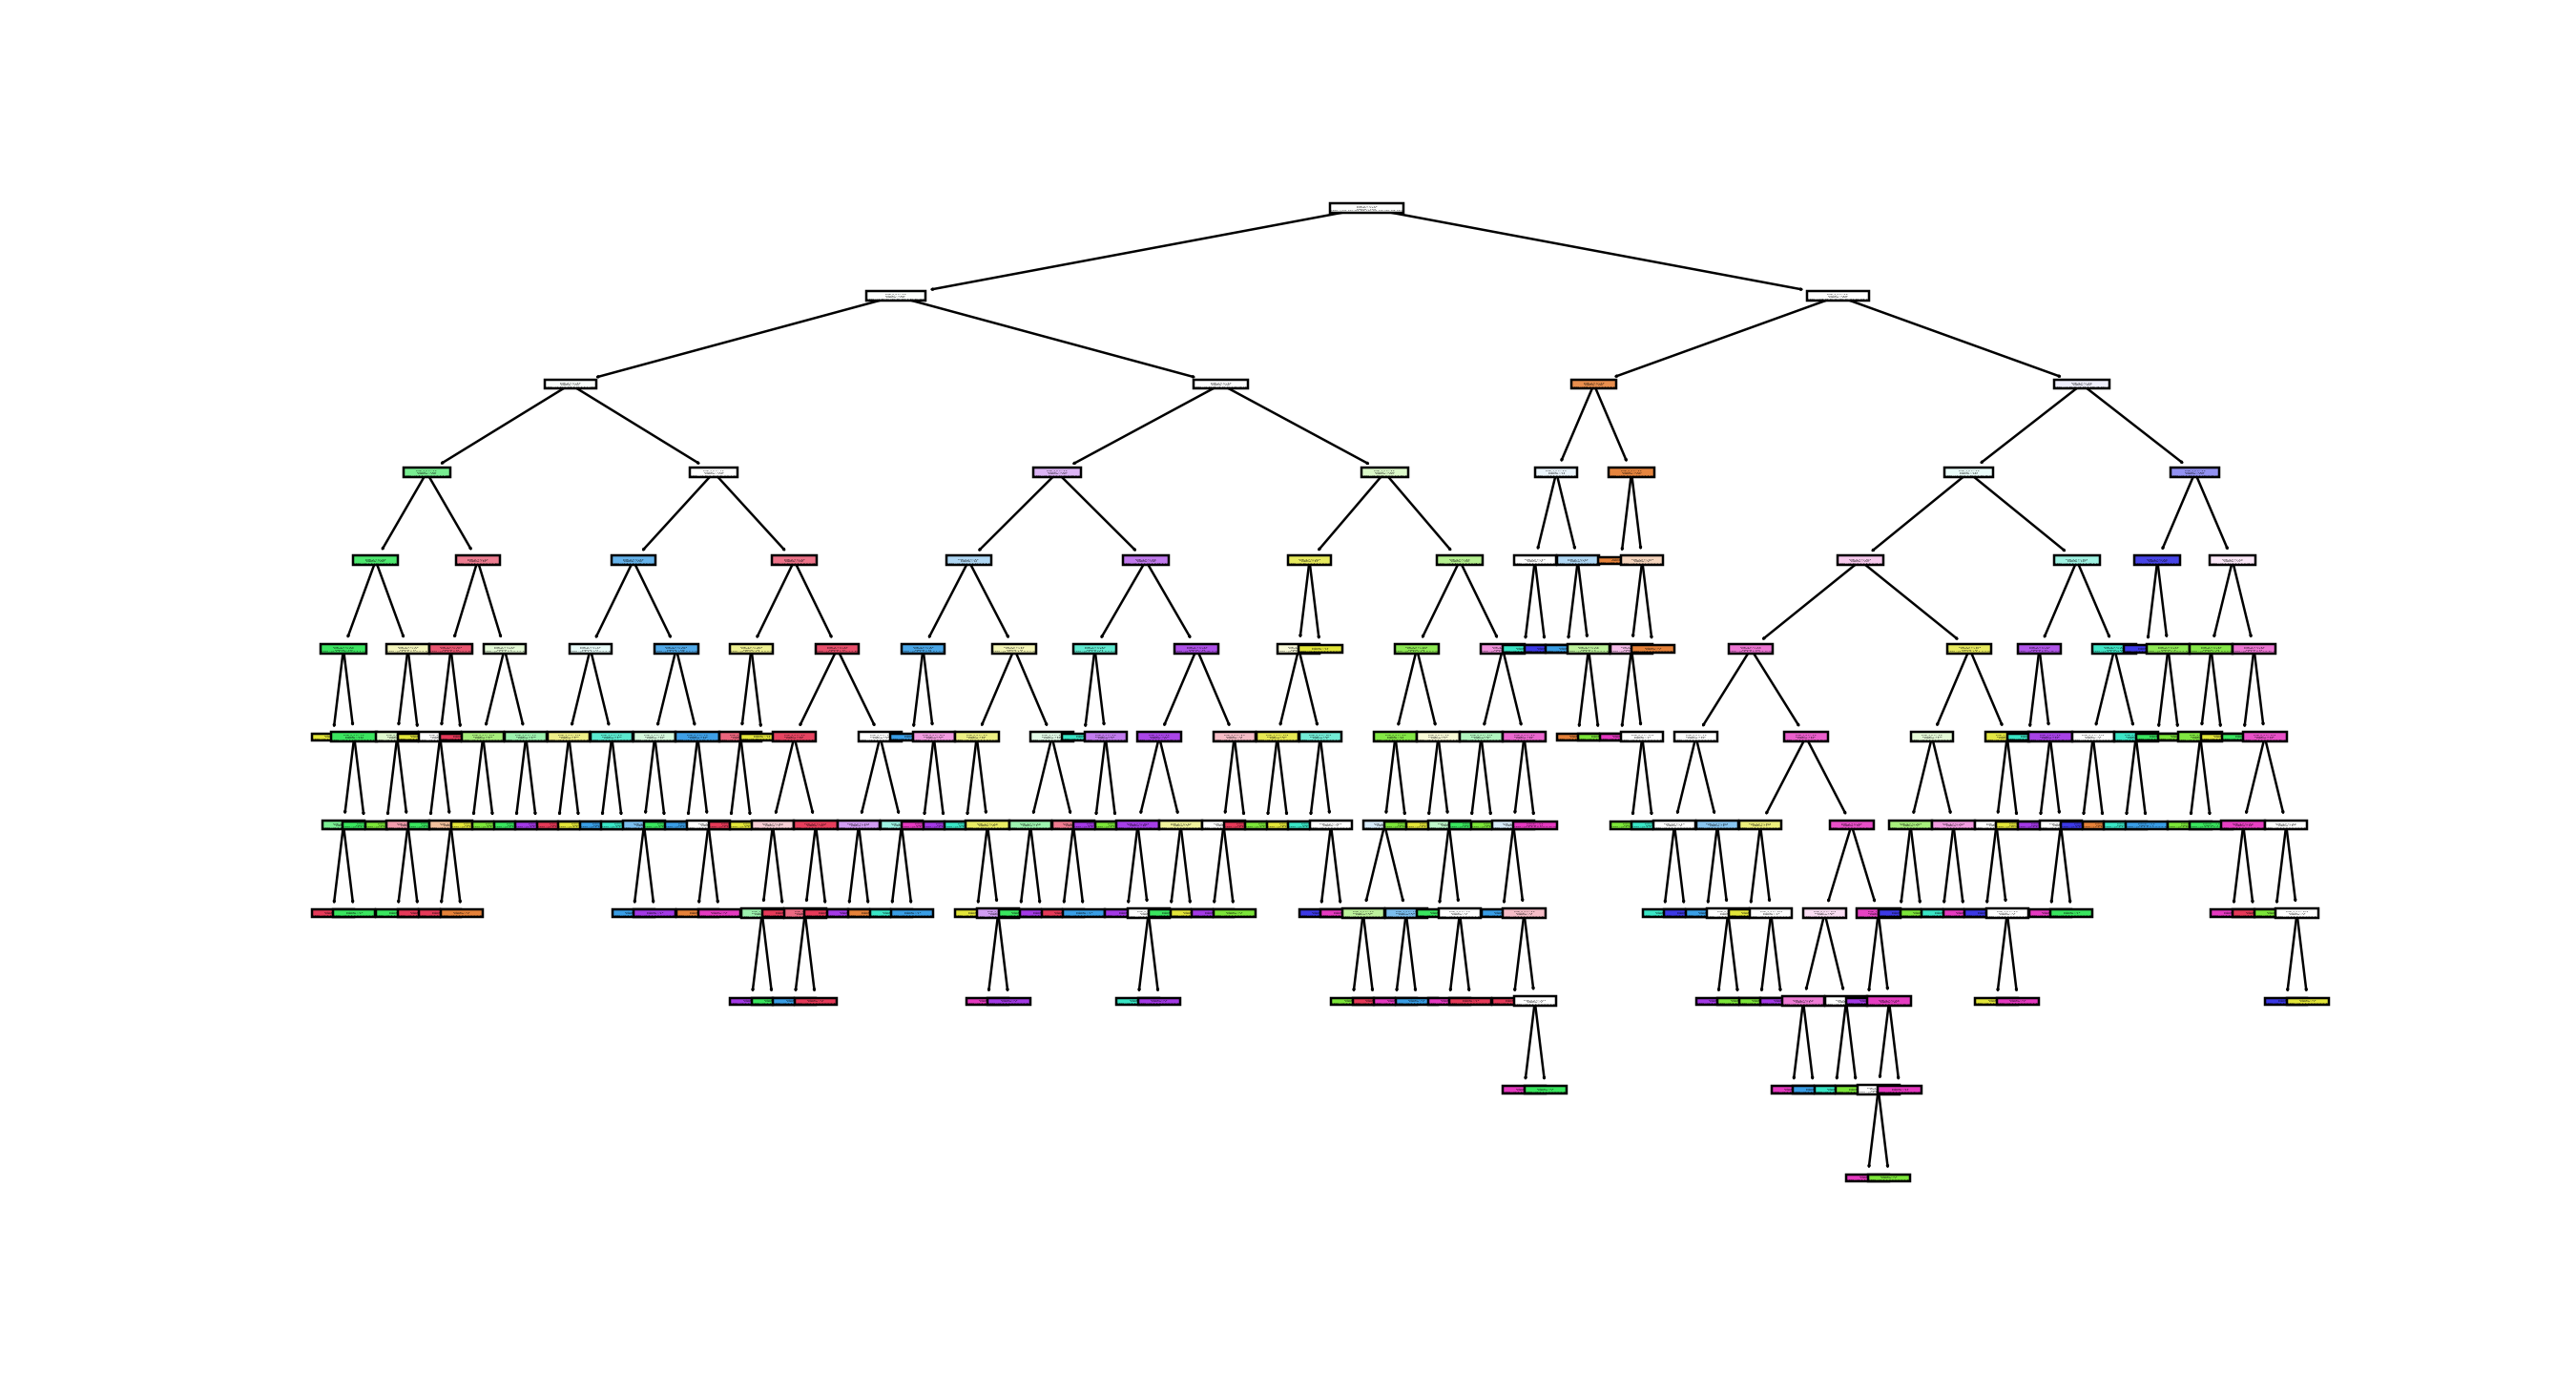

In [30]:
%matplotlib notebook
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(decision_tree.fit(X_train, y_train), feature_names = ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2',
 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2',
 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2',
 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2',
 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
                  class_names = ['0','1','2','3','4','5','6','7','8','9'],
                   filled = True)

* Max_depth를 4로 제한했더니 root_node로부터 가지가 4번 뻗친 뒤 leaf_node가 생성된걸 볼 수 있다.
* Max_depth를 default로 뒀을 때보다(12번 뻗침) 뻗친 가지수가 적어 분류가 충분히 진행되지 못해 평가지표의 성능이 전체적으로 대폭 감소함
* Max_depth를 늘려보자(30으로 설정)

In [25]:
decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=30, random_state=0)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
evaluate_classifier(y_test, y_pred)

Accuracy:  0.8611
Precision:  0.8641
Recall:  0.8655
F_SCORE:  0.8627
              precision    recall  f1-score   support

           0       0.97      0.90      0.93        31
           1       0.79      0.89      0.84        38
           2       0.87      0.87      0.87        38
           3       0.83      0.93      0.88        27
           4       0.97      0.80      0.88        41
           5       0.87      0.94      0.90        35
           6       0.92      0.87      0.89        38
           7       0.84      0.94      0.89        34
           8       0.74      0.71      0.72        35
           9       0.85      0.79      0.82        43

    accuracy                           0.86       360
   macro avg       0.86      0.87      0.86       360
weighted avg       0.87      0.86      0.86       360



<IPython.core.display.Javascript object>


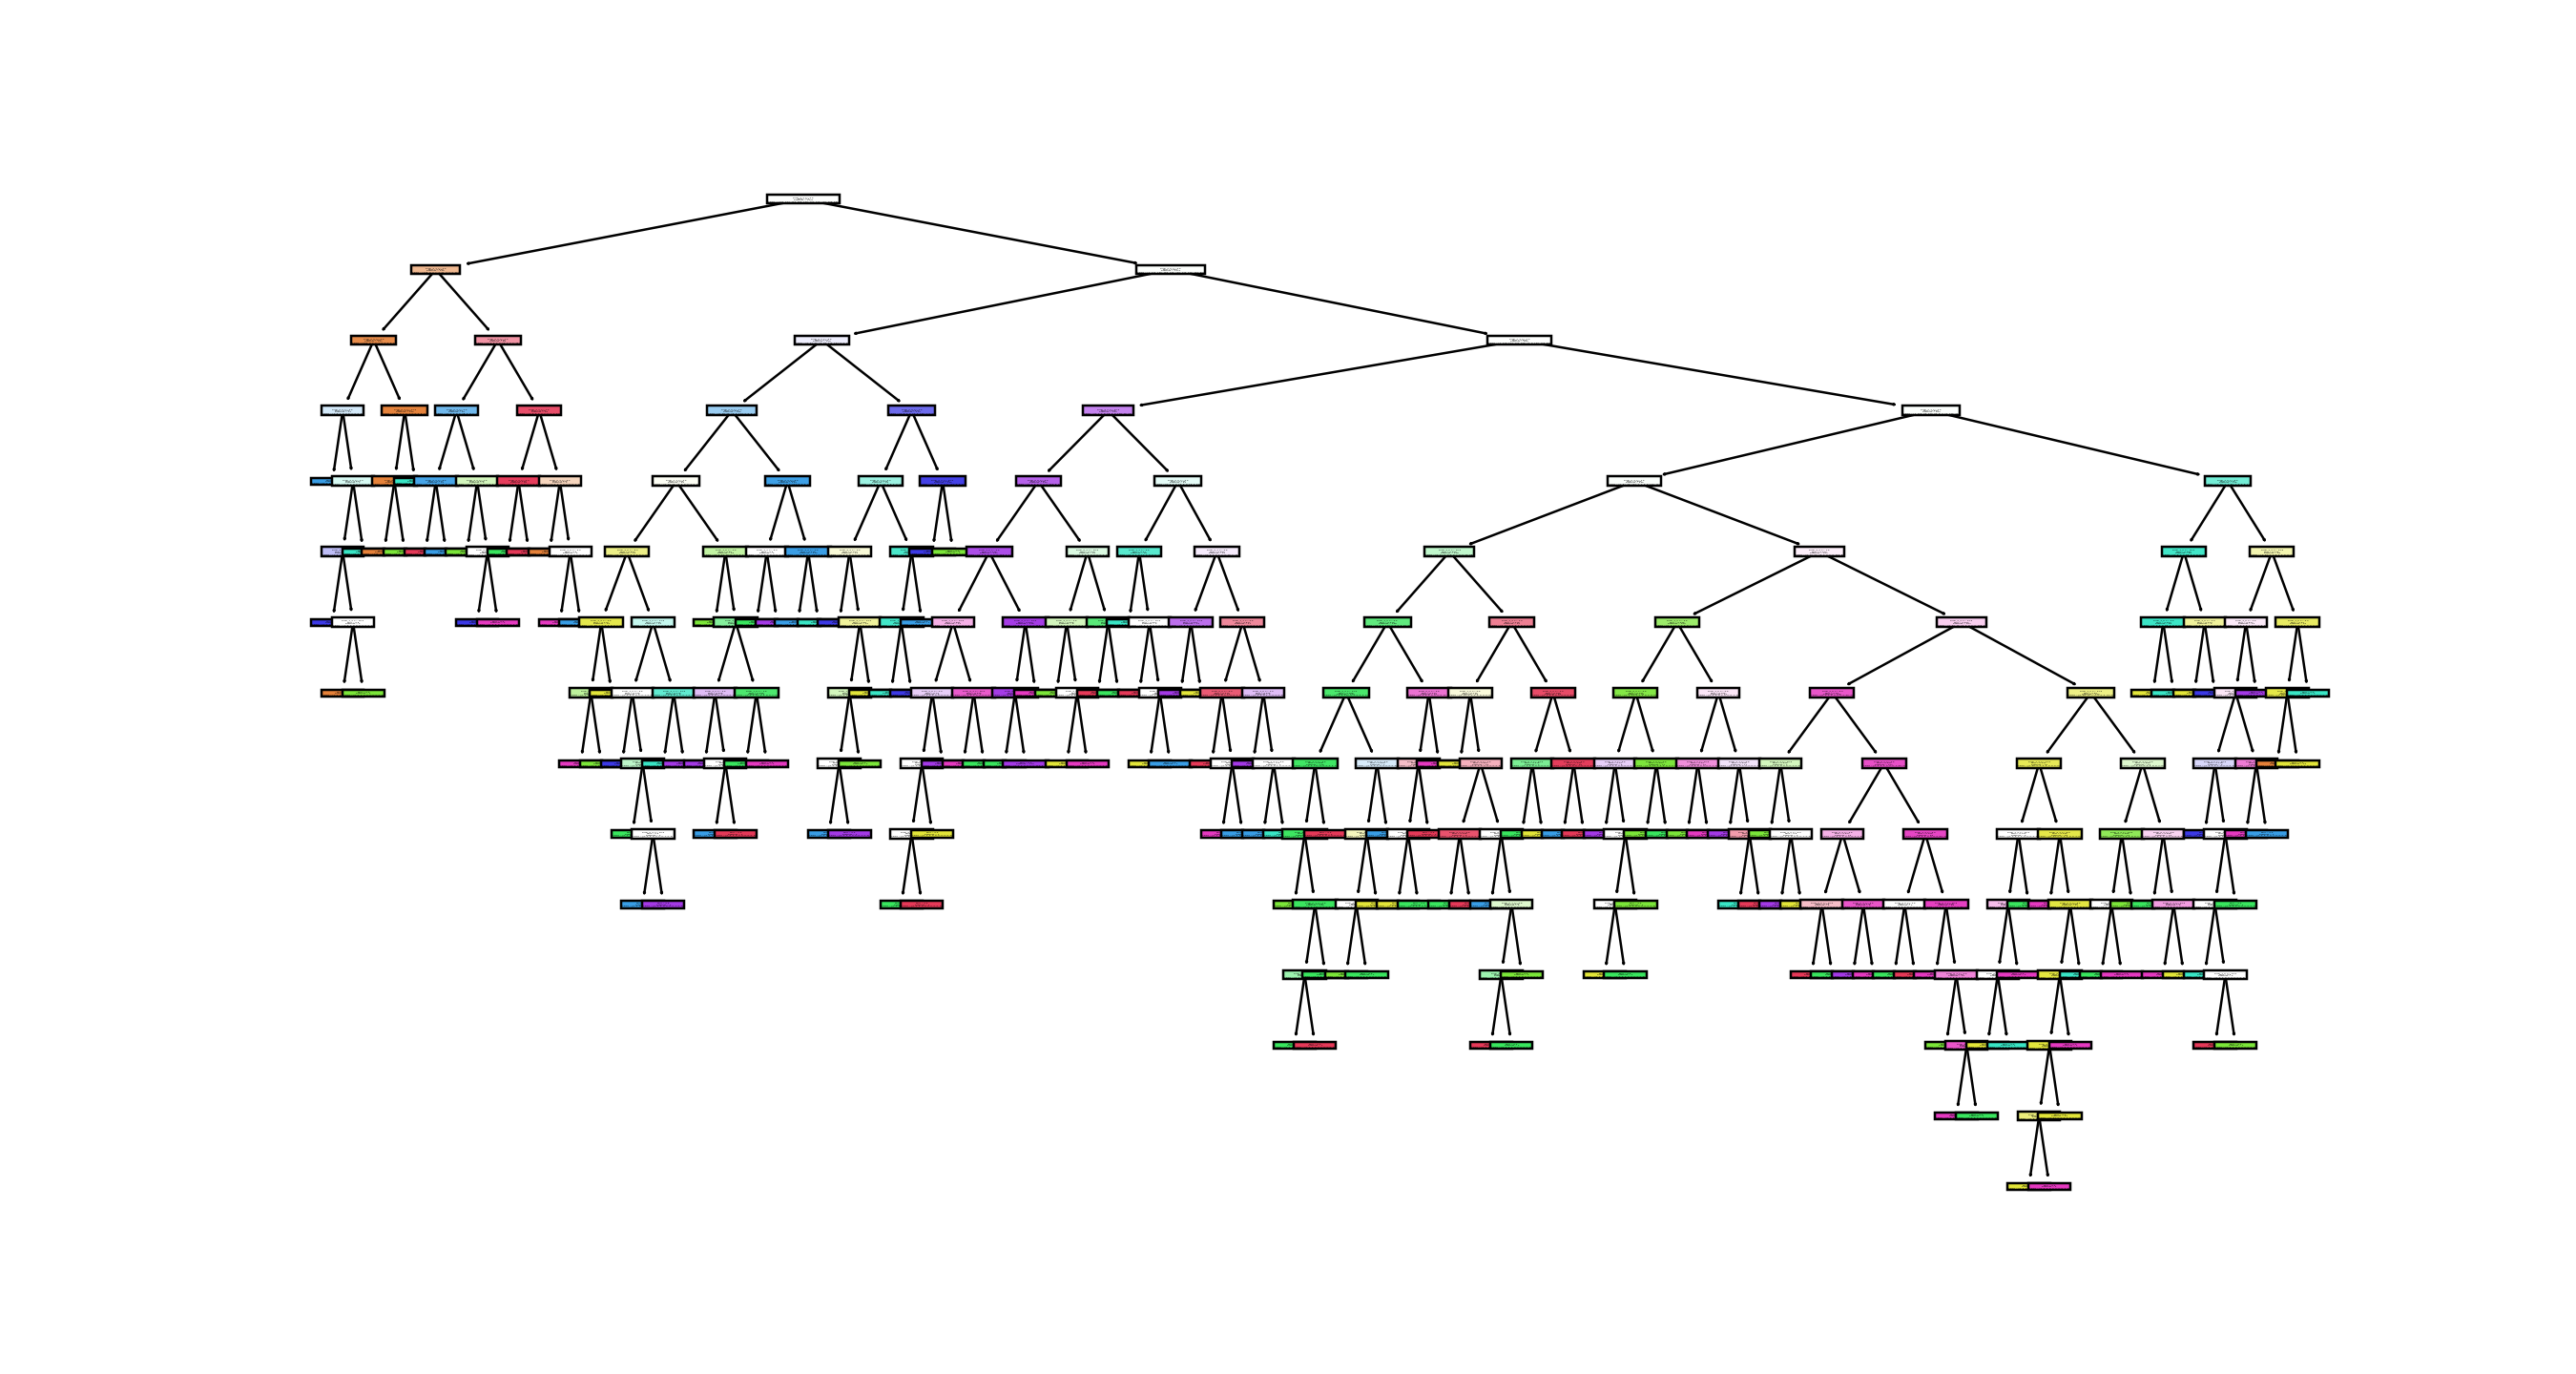

In [26]:
%matplotlib notebook
fig = plt.figure(figsize=(15,8))
_ = tree.plot_tree(decision_tree.fit(X_train, y_train), feature_names = ['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2',
 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2',
 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2',
 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2',
 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7'],
                  class_names = ['0','1','2','3','4','5','6','7','8','9'],
                   filled = True)

* Max_depth를 2배 이상 높였을 때 평가지표가 전체적으로 아주 미미하게 향상된 것으로 보아 이미 default로 돌린 max_depth이후로는 분류성능이 saturation된 듯 하다.
* 분류 기준을 default인 gini에서 entropy로 바꿔보면?

In [27]:
decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=0)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
evaluate_classifier(y_test, y_pred)

Accuracy:  0.8722
Precision:  0.8722
Recall:  0.8717
F_SCORE:  0.8710
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.94      0.87      0.90        38
           2       0.95      0.97      0.96        38
           3       0.75      0.78      0.76        27
           4       0.89      0.80      0.85        41
           5       0.74      0.83      0.78        35
           6       0.97      0.92      0.95        38
           7       0.86      0.94      0.90        34
           8       0.78      0.83      0.81        35
           9       0.86      0.84      0.85        43

    accuracy                           0.87       360
   macro avg       0.87      0.87      0.87       360
weighted avg       0.88      0.87      0.87       360



* 역시나 큰 차이가 없다. 이 모델이 왜 digits 분류를 잘 못하는지는 어떻게 알 수 있는거지?